<a href="https://colab.research.google.com/github/gpensabem/Learnings/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Converte arquivos de imagens MNIST para um tensor de 4 dimensões (n de imagens, altura, largura e cor)
transform = transforms.ToTensor()

In [4]:
# Dados de Treino
train_data = datasets.MNIST(root = 'cnn_data', train=True, download=True, transform=transform)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15712629.24it/s]


Extracting cnn_data/MNIST/raw/train-images-idx3-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 487483.27it/s]


Extracting cnn_data/MNIST/raw/train-labels-idx1-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4444674.56it/s]


Extracting cnn_data/MNIST/raw/t10k-images-idx3-ubyte.gz to cnn_data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 1292788.33it/s]

Extracting cnn_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to cnn_data/MNIST/raw



In [5]:
#Dados de Treino
test_data = datasets.MNIST(root = 'cnn_data', train=False, download=True, transform=transform)

In [6]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [8]:
#Criando uma batch para imagens, 10
train_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [9]:
#Definindo o modelo CNN
#Descreve as camadas convulacionais e o que ela está fazendo (2 camadas)
conv1 = nn.Conv2d(1, 6, 3, 1)
conv2 = nn.Conv2d(6, 16, 3, 1)

In [10]:
#Pega uma imagem MNIST
for i, (X_Train, y_train) in enumerate(train_data):
  break

In [11]:
X_Train.shape

torch.Size([1, 28, 28])

In [12]:
x = X_Train.view(1, 1, 28, 28)

In [13]:
#Primeira Convolução
x = F.relu(conv1(x)) #função de ativação

In [14]:
#pega uma imagem, com 6 filtros
x.shape

torch.Size([1, 6, 26, 26])

In [15]:
#percorrendo através da pool layer
x = F.max_pool2d(x, 2, 2) #kernel e stride de 2

In [16]:
x.shape #26/2 = 13

torch.Size([1, 6, 13, 13])

In [17]:
#Segunda Convolução
x = F.relu(conv2(x))

In [18]:
x.shape #não usamos padding pois as bordas não importam, então perdemos 2 pixels

torch.Size([1, 16, 11, 11])

In [19]:
#Pooling Layer
x = F.max_pool2d(x, 2, 2)

In [20]:
x.shape # de 11 foi para 5 pois é necessario arrendondar para baixo. Não pode ser arredondado pra cima porque não é possivel criar dados do nada

torch.Size([1, 16, 5, 5])

In [21]:
#Model Class
class ConvolutionalNetwork(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1, 6, 3, 1)
    self.conv2 = nn.Conv2d(6, 16, 3, 1)
    #Camada totalmente conectada
    self.fc1 = nn.Linear(5*5*16, 120)  # Adjusted input size for the fully connected layer
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10) #a entrada de uma é a saida de outra e diminui a quantidade

    #Forward Function
  def forward(self, X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2) #kernel 2x2 e stride 2
    #segunda passada
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2) #kernel 2x2 e stride 2

    #Re-view to flatten it out
    X = X.view(-1, 5*5*16)  # Flatten the tensor based on the output of conv layers
    #Camada Totalmente Conectada
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X, dim=1)



In [23]:
#Criando uma instância do modelo
torch.manual_seed(41)
model = ConvolutionalNetwork()
model

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [25]:
 #Função para otimização de Perda
 criterion = nn.CrossEntropyLoss()
 optimizer = torch.optim.Adam(model.parameters(), lr=0.001)#Menor a taxa de aprendizado, mais demorará a treinar

In [26]:
import time
start_time = time.time()

#Criando variavel para rastrear coisas
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#For Loop para as Epocas
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #Treinar
  for b,(X_train, y_train) in enumerate(train_loader):
    b+=1 # Começa o batch em 1
    y_pred = model(X_train) #pega valores previstos dos dados de treinamento. não achatado em 2d

    loss = criterion(y_pred, y_train) #Compara as predições com as corretas
    predicted = torch.max(y_pred.data, 1) [1] #adicionar o numero de predições correta. Indexadas no primero ponto
    batch_corr = (predicted == y_train).sum() # quantos corretos conseguimos com esse batch. True = 1, False = 0
    trn_corr += batch_corr #acompanha como está sendo o treinamento


    #Dando Update nos parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Imprimindo resultados
    if b%600 == 0:
      print(f'Epoch: {i} Batch: {b} Loss:{loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)


  #test
  with torch.no_grad(): #Nenhum gradiente, então a gente não dá update nos pesos e bias com os dados de testes
    for b, (X_test, y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data, 1)[1]# Adicionando as predições corretas
      tst_corr += (predicted == y_test).sum() # T=1 F=0 e soma

  loss = criterion(y_val, y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)


current_time = time.time()
total = current_time - start_time
print(f'Training Took: {total/60} minutes!')

Epoch: 0 Batch: 600 Loss:0.012505742721259594
Epoch: 0 Batch: 1200 Loss:0.059554439038038254
Epoch: 0 Batch: 1800 Loss:0.01286345161497593
Epoch: 0 Batch: 2400 Loss:0.13558034598827362
Epoch: 0 Batch: 3000 Loss:0.004820442292839289
Epoch: 0 Batch: 3600 Loss:0.010546308942139149
Epoch: 0 Batch: 4200 Loss:0.24395230412483215
Epoch: 0 Batch: 4800 Loss:0.007479517254978418
Epoch: 0 Batch: 5400 Loss:0.009367642924189568
Epoch: 0 Batch: 6000 Loss:0.0018434313824400306
Epoch: 1 Batch: 600 Loss:0.03221464157104492
Epoch: 1 Batch: 1200 Loss:0.003333463566377759
Epoch: 1 Batch: 1800 Loss:0.04126342386007309
Epoch: 1 Batch: 2400 Loss:0.14685525000095367
Epoch: 1 Batch: 3000 Loss:0.12026345729827881
Epoch: 1 Batch: 3600 Loss:0.0001952919119503349
Epoch: 1 Batch: 4200 Loss:0.00016604487609583884
Epoch: 1 Batch: 4800 Loss:0.0006250619189813733
Epoch: 1 Batch: 5400 Loss:0.0019755663815885782
Epoch: 1 Batch: 6000 Loss:0.0005515654920600355
Epoch: 2 Batch: 600 Loss:0.029676983132958412
Epoch: 2 Batch: 

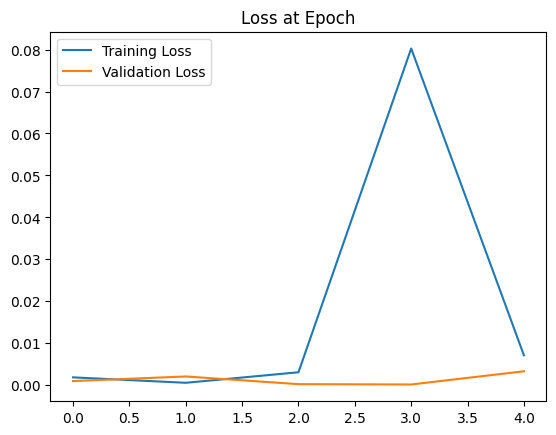

In [34]:
#Plotando os graficos das perdas por epoch
# train_losses = [tl.item() for tl in train_losses]
plt.plot(train_losses, label="Training Loss")
plt.plot(test_losses, label="Validation Loss")
plt.title("Loss at Epoch")
plt.legend()
plt.show()

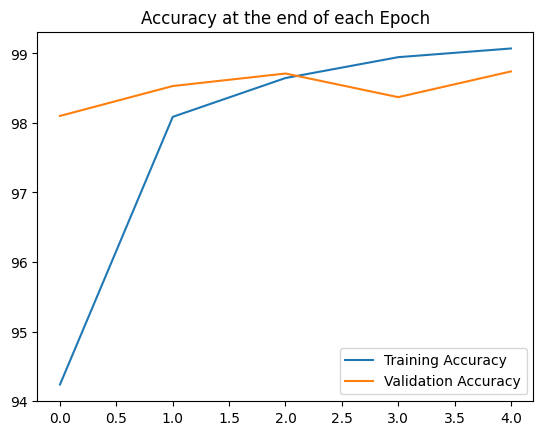

In [35]:
#plotar a acuracia no final de cada epoch
plt.plot([t/600 for t in train_correct], label="Training Accuracy")
plt.plot([t/100 for t in test_correct], label="Validation Accuracy")
plt.title("Accuracy at the end of each Epoch")
plt.legend()

In [36]:
test_load_everything = DataLoader(test_data, batch_size=10000, shuffle=False)

In [37]:
with torch.no_grad():
  correct = 0
  for X_test, y_test in test_load_everything:
    y_val = model(X_test)
    predicted = torch.max(y_val.data, 1)[1]
    correct += (predicted == y_test).sum()

In [39]:
correct.item()/len(test_data)*100

98.74000000000001

In [40]:
#Pegando uma imagem
test_data[4123] #tensor contendo uma imagem nela e seus conteudos... no final mostra qual é a legenda (qual numero é)


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [41]:
#pegando apenas os dados
test_data[4123][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [42]:
#Reshape
test_data[4123][0].view(1, 1, 28, 28)


tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

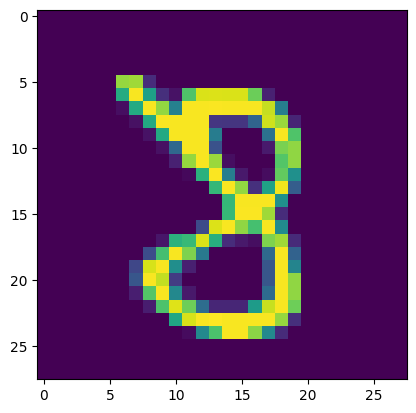

In [43]:
#mostrando a imagem
plt.imshow(test_data[4123][0].reshape(28,28))

In [45]:
#Passando a imagem através do modelo
model.eval()
with torch.no_grad():
  new_prediction = model(test_data[4123][0].view(1, 1, 28, 28)) # batch size of 1, 1 color channel, 28x28 image

In [47]:
#Checando a nota predição, pegando as probabilidades e vendo qual é a maior
new_prediction

tensor([[-1.7280e+01, -1.6449e+01, -1.3824e+01, -6.0542e+00, -1.5049e+01,
         -9.5330e+00, -1.6524e+01, -1.5372e+01, -2.4301e-03, -1.2177e+01]])

In [48]:
new_prediction.argmax()

tensor(8)